# MSiA 420 - Predictive Analytics II - Final Project
## Group 3: Alejandra Lelo de Larrea Ibarra, Kiran Jyothi Sheena, Lixuan (Ellen) Chen, Wencheng Zhang

# Neural Network

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import time

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import RepeatedKFold,GridSearchCV

In [2]:
## Reading the csv file directly from the zip file without extracting it

archive = zipfile.ZipFile('../02_Data/hotel_bookings_ohe.csv.zip', 'r')
files = archive.namelist()
with archive.open(files[0]) as csvfile:   
    df = pd.read_csv(csvfile)

In [3]:
df.head(5)

,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,previous_bookings,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,2015,2,0,0,0,3,0,5.837730,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2015,2,0,0,0,4,0,6.603944,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2015,1,0,0,0,0,0,2.079442,1,0,...,0,0,1,0,0,0,0,1,0,0
3,2015,1,0,0,0,0,0,2.639057,1,0,...,0,0,1,0,0,0,0,1,0,0
4,2015,2,0,0,0,0,1,2.708050,2,0,...,1,0,1,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119388 entries, 0 to 119387
Data columns (total 66 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   arrival_date_year              119388 non-null  int64  
 1   adults                         119388 non-null  int64  
 2   children                       119388 non-null  int64  
 3   babies                         119388 non-null  int64  
 4   previous_cancellations         119388 non-null  int64  
 5   booking_changes                119388 non-null  int64  
 6   total_of_special_requests      119388 non-null  int64  
 7   log_lead_time                  119388 non-null  float64
 8   total_nights                   119388 non-null  int64  
 9   previous_bookings              119388 non-null  int64  
 10  log_days_in_waiting_list       119388 non-null  float64
 11  log_adr                        119388 non-null  float64
 12  arrival_month_1               

In [5]:
numerical_cols = ['arrival_date_year', 'adults', 'children', 'babies',
       'previous_cancellations', 'booking_changes',
       'total_of_special_requests', 'log_lead_time', 'total_nights',
       'previous_bookings', 'log_days_in_waiting_list', 'log_adr']

cat_cols = [col for col in df.columns if col not in numerical_cols]


In [6]:
# get train indexes
train_ind = pd.read_csv("../02_Data/train_index.csv")

# split train
train = df.iloc[train_ind.Train_Index,:]
train.reset_index(inplace = True, drop = True)

# Split test 
test = df.iloc[df.index.difference(train_ind.Train_Index),:]

In [7]:
## Standardising the numerical columns
df_train_std = train.copy()
df_test_std = test.copy()

sc = StandardScaler().fit(df_train_std[numerical_cols])
df_train_std[numerical_cols] = sc.transform(df_train_std[numerical_cols])
 
df_test_std[numerical_cols] = sc.transform(df_test_std[numerical_cols])

### Fitting a neural network model with all features

In [8]:
## Creating the X and y variables

X_train = df_train_std.drop("is_canceled",axis=1)
y_train = df_train_std["is_canceled"]

X_test = df_test_std.drop("is_canceled",axis=1)
y_test = df_test_std["is_canceled"]

In [7]:
# define a neural network model with stochastic optimizer
np.random.seed(456)

clf_init = MLPClassifier(
    ## archiecture hyperparameters ## 
    hidden_layer_sizes=20, # scalar -> single hidden layer with 20 units
    activation='logistic', # activation function for the hidden layer
    alpha=1e-4,# regularization parameter,
    solver='adam', # stochastic optimizer (default)
    learning_rate_init=0.01,# learning rate, controls the step size
    batch_size=512, # the number of samples considered in each iteration
    max_iter = 300, # number of epochs through the training set,
    #early_stopping=True, # monitor validation_loss and stop if there is no improvement
    #n_iter_no_change=10, # if validation loss doesn't improve for 10 epochs, terminate optimization
    #validation_fraction=0.1, # fraction of the dataset to set as aside as validation data
    verbose=False,
    random_state=456
)

# fit model
clf_init.fit(X_train,y_train)

MLPClassifier(activation='logistic', batch_size=512, hidden_layer_sizes=20,
              learning_rate_init=0.01, max_iter=300, random_state=456)

In [9]:
y_pred_class = clf_init.predict(X_test)

In [10]:
## Calculating the roc

conf_matrix = confusion_matrix(y_test, y_pred_class)


print('AUC score is ',roc_auc_score(y_test,y_pred_class))
misclass = (conf_matrix[0][1]+conf_matrix[1][0])/(sum(sum(conf_matrix)))
print('Misclass rate is ',misclass)

# --- Metrics---

print('\n--- EVALUATION METRICS ---:')
print('\nConfusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')

print(classification_report(y_test,y_pred_class))


AUC score is  0.8502906891407417
Misclass rate is  0.13364325501528668

--- EVALUATION METRICS ---:

Confusion Matrix:
[[13724  1325]
 [ 1866  6962]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     15049
           1       0.84      0.79      0.81      8828

    accuracy                           0.87     23877
   macro avg       0.86      0.85      0.85     23877
weighted avg       0.87      0.87      0.87     23877



### Performing Gridsearch CV

In [7]:
np.random.seed(3)

clf_cv_init = MLPClassifier(
    ## archiecture hyperparameters ## 
    #hidden_layer_sizes=20, # scalar -> single hidden layer with 20 units
    activation='logistic', # activation function for the hidden layer
    #alpha=1e-4,# regularization parameter,
    solver='adam', # stochastic optimizer (default)
    #learning_rate_init=0.01,# learning rate, controls the step size
    batch_size=512, # the number of samples considered in each iteration
    max_iter = 500, # number of epochs through the training set,
    #early_stopping=True, # monitor validation_loss and stop if there is no improvement
    #n_iter_no_change=10, # if validation loss doesn't improve for 10 epochs, terminate optimization
    #validation_fraction=0.1, # fraction of the dataset to set as aside as validation data,
    random_state=3,
    verbose=False
)

clf_final = GridSearchCV(
    estimator = clf_cv_init,
    param_grid = { # dictionary containing possible values of each hyperparameter
        'alpha':[1e-4,1e-3,1e-1],
        'hidden_layer_sizes':[10,20,30],
        'learning_rate_init':[1e-3,1e-2,1e-1]
    },
    scoring='accuracy', # scoring metric - prediction accuracy
    refit=True,
    cv = KFold(n_splits=5,shuffle=True), # 1 replicate of 5-fold CV
    verbose=3
).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.001;, score=0.856 total time=  14.5s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.001;, score=0.856 total time=  19.6s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.001;, score=0.857 total time=  13.4s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.001;, score=0.861 total time=  12.1s
[CV 5/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.001;, score=0.857 total time=  13.1s
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.01;, score=0.860 total time=   7.4s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.01;, score=0.859 total time=   9.6s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.01;, score=0.857 total time=   7.9s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=10, learning_rate_init=0.01;, s

[CV 3/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.001;, score=0.864 total time=  41.1s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.001;, score=0.868 total time=  33.5s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.001;, score=0.866 total time=  45.3s
[CV 1/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.01;, score=0.861 total time=  19.2s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.01;, score=0.861 total time=  24.5s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.01;, score=0.864 total time=  26.4s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.01;, score=0.864 total time=  15.5s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.01;, score=0.867 total time=  17.5s
[CV 1/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.1;, score=0.858 total time=   5.0s
[CV 2/5] END alpha=0.001, hidden_layer_sizes

In [8]:
print('Best parameters')
print(clf_final.best_params_)

print('Best CV accuracy: %.3f'%clf_final.best_score_)

Best parameters
{'alpha': 0.001, 'hidden_layer_sizes': 30, 'learning_rate_init': 0.001}
Best CV accuracy: 0.865


In [9]:
### Testing with test dataset

y_pred_class = clf_final.predict(X_test)

## Calculating the roc

conf_matrix = confusion_matrix(y_test, y_pred_class)


print('AUC score is ',roc_auc_score(y_test,y_pred_class))
misclass = (conf_matrix[0][1]+conf_matrix[1][0])/(sum(sum(conf_matrix)))
print('Misclass rate is ',misclass)

# --- Metrics---

print('\n--- EVALUATION METRICS ---:')
print('\nConfusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')

print(classification_report(y_test,y_pred_class))


AUC score is  0.8490308414954887
Misclass rate is  0.13322444193156593

--- EVALUATION METRICS ---:

Confusion Matrix:
[[13802  1247]
 [ 1934  6894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15049
           1       0.85      0.78      0.81      8828

    accuracy                           0.87     23877
   macro avg       0.86      0.85      0.85     23877
weighted avg       0.87      0.87      0.87     23877



### Second trial with increasing nodes

In [10]:
## Second batch

np.random.seed(3)

clf_cv_init = MLPClassifier(
    ## archiecture hyperparameters ## 
    #hidden_layer_sizes=20, # scalar -> single hidden layer with 20 units
    activation='logistic', # activation function for the hidden layer
    #alpha=1e-4,# regularization parameter,
    solver='adam', # stochastic optimizer (default)
    learning_rate_init=0.001,# learning rate, controls the step size
    batch_size=512, # the number of samples considered in each iteration
    max_iter = 500, # number of epochs through the training set,
    #early_stopping=True, # monitor validation_loss and stop if there is no improvement
    #n_iter_no_change=10, # if validation loss doesn't improve for 10 epochs, terminate optimization
    #validation_fraction=0.1, # fraction of the dataset to set as aside as validation data,
    random_state=3,
    verbose=False
)

clf_final_2 = GridSearchCV(
    estimator = clf_cv_init,
    param_grid = { # dictionary containing possible values of each hyperparameter
        'alpha':[1e-3,0.005,1e-1,0.2],
        'hidden_layer_sizes':[30,40,50],
    },
    scoring='accuracy', # scoring metric - prediction accuracy
    refit=True,
    cv = KFold(n_splits=5,shuffle=True), # 1 replicate of 5-fold CV
    verbose=3
).fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END alpha=0.001, hidden_layer_sizes=30;, score=0.864 total time=  36.2s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=30;, score=0.863 total time=  31.0s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=30;, score=0.864 total time=  38.1s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=30;, score=0.868 total time=  30.5s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=30;, score=0.866 total time=  32.2s
[CV 1/5] END alpha=0.001, hidden_layer_sizes=40;, score=0.867 total time=  46.9s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=40;, score=0.865 total time=  58.8s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=40;, score=0.864 total time= 1.0min
[CV 4/5] END alpha=0.001, hidden_layer_sizes=40;, score=0.869 total time= 1.1min
[CV 5/5] END alpha=0.001, hidden_layer_sizes=40;, score=0.870 total time= 1.1min
[CV 1/5] END alpha=0.001, hidden_layer_sizes=50;, score=0.869 total time= 1.5min
[CV 2/5] END alpha=0.001, hidden_layer_sizes=50;

In [12]:
print('Best parameters')
print(clf_final_2.best_params_)

print('Best CV accuracy: %.3f'%clf_final_2.best_score_)

Best parameters
{'alpha': 0.001, 'hidden_layer_sizes': 50}
Best CV accuracy: 0.868


In [13]:
### Testing with test dataset

y_pred_class = clf_final_2.predict(X_test)

## Calculating the roc

conf_matrix = confusion_matrix(y_test, y_pred_class)


print('AUC score is ',roc_auc_score(y_test,y_pred_class))
misclass = (conf_matrix[0][1]+conf_matrix[1][0])/(sum(sum(conf_matrix)))
print('Misclass rate is ',misclass)

# --- Metrics---

print('\n--- EVALUATION METRICS ---:')
print('\nConfusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')

print(classification_report(y_test,y_pred_class))


AUC score is  0.8593324674211049
Misclass rate is  0.12752858399296393

--- EVALUATION METRICS ---:

Confusion Matrix:
[[13691  1358]
 [ 1687  7141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     15049
           1       0.84      0.81      0.82      8828

    accuracy                           0.87     23877
   macro avg       0.87      0.86      0.86     23877
weighted avg       0.87      0.87      0.87     23877



### Third try with increasing number of Nodes

In [7]:
## Third batch

np.random.seed(3)

clf_cv_init = MLPClassifier(
    ## archiecture hyperparameters ## 
    #hidden_layer_sizes=20, # scalar -> single hidden layer with 20 units
    activation='logistic', # activation function for the hidden layer
    alpha=0.001,# regularization parameter,
    solver='adam', # stochastic optimizer (default)
    learning_rate_init=0.001,# learning rate, controls the step size
    batch_size=512, # the number of samples considered in each iteration
    max_iter = 1000, # number of epochs through the training set,
    #early_stopping=True, # monitor validation_loss and stop if there is no improvement
    #n_iter_no_change=10, # if validation loss doesn't improve for 10 epochs, terminate optimization
    #validation_fraction=0.1, # fraction of the dataset to set as aside as validation data,
    random_state=3,
    verbose=False
)

clf_final_3 = GridSearchCV(
    estimator = clf_cv_init,
    param_grid = { # dictionary containing possible values of each hyperparameter
        'hidden_layer_sizes':[60,70,80]
    },
    scoring='accuracy', # scoring metric - prediction accuracy
    refit=True,
    cv = KFold(n_splits=5,shuffle=True), # 1 replicate of 5-fold CV
    verbose=3
).fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............hidden_layer_sizes=60;, score=0.866 total time= 1.3min
[CV 2/5] END .............hidden_layer_sizes=60;, score=0.867 total time=  59.5s
[CV 3/5] END .............hidden_layer_sizes=60;, score=0.867 total time= 1.3min
[CV 4/5] END .............hidden_layer_sizes=60;, score=0.868 total time= 1.4min
[CV 5/5] END .............hidden_layer_sizes=60;, score=0.869 total time= 1.4min
[CV 1/5] END .............hidden_layer_sizes=70;, score=0.868 total time= 2.8min
[CV 2/5] END .............hidden_layer_sizes=70;, score=0.865 total time= 1.3min
[CV 3/5] END .............hidden_layer_sizes=70;, score=0.868 total time= 2.1min
[CV 4/5] END .............hidden_layer_sizes=70;, score=0.867 total time= 1.8min
[CV 5/5] END .............hidden_layer_sizes=70;, score=0.873 total time= 1.6min
[CV 1/5] END .............hidden_layer_sizes=80;, score=0.870 total time= 1.9min
[CV 2/5] END .............hidden_layer_sizes=80;,

In [8]:
print('Best parameters')
print(clf_final_3.best_params_)

print('Best CV accuracy: %.3f'%clf_final_3.best_score_)

Best parameters
{'hidden_layer_sizes': 80}
Best CV accuracy: 0.869


In [9]:
### Testing with test dataset

y_pred_class = clf_final_3.predict(X_test)

## Calculating the roc

conf_matrix = confusion_matrix(y_test, y_pred_class)


print('AUC score is ',roc_auc_score(y_test,y_pred_class))
misclass = (conf_matrix[0][1]+conf_matrix[1][0])/(sum(sum(conf_matrix)))
print('Misclass rate is ',misclass)

# --- Metrics---

print('\n--- EVALUATION METRICS ---:')
print('\nConfusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')

print(classification_report(y_test,y_pred_class))


AUC score is  0.8616541612758539
Misclass rate is  0.12761234660970808

--- EVALUATION METRICS ---:

Confusion Matrix:
[[13587  1462]
 [ 1585  7243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     15049
           1       0.83      0.82      0.83      8828

    accuracy                           0.87     23877
   macro avg       0.86      0.86      0.86     23877
weighted avg       0.87      0.87      0.87     23877



There is no considerable difference between a neural network of size 80 and 50. So we choose the network with the parameters {'learning_rate':0.001,'alpha': 0.001, 'hidden_layer_sizes': 50} as the best model

## Evaluating the final model

In [19]:
from alepython import ale_plot

In [20]:
np.random.seed(3)

start_time = time.time()

clf_mlp_final = MLPClassifier(
    ## archiecture hyperparameters ## 
    hidden_layer_sizes=50, # scalar -> single hidden layer with 20 units
    activation='logistic', # activation function for the hidden layer
    alpha=0.001,# regularization parameter,
    solver='adam', # stochastic optimizer (default)
    learning_rate_init=0.001,# learning rate, controls the step size
    batch_size=512, # the number of samples considered in each iteration
    max_iter = 500, # number of epochs through the training set,
    #early_stopping=True, # monitor validation_loss and stop if there is no improvement
    #n_iter_no_change=10, # if validation loss doesn't improve for 10 epochs, terminate optimization
    #validation_fraction=0.1, # fraction of the dataset to set as aside as validation data,
    random_state=3,
    verbose=False
)

clf_mlp_final.fit(X_train,y_train)

stop_time = time.time()

print('Time taken to fit the Neural Network model is {:.2f}'.format(stop_time-start_time),'s')

Time taken to fit the Neural Network model is 60.86 s


In [36]:
### Testing with test dataset

y_pred_class = clf_mlp_final.predict(X_test)

## Calculating the roc

conf_matrix = confusion_matrix(y_test, y_pred_class)


print('AUC score is ',roc_auc_score(y_test,y_pred_class))
misclass = (conf_matrix[0][1]+conf_matrix[1][0])/(sum(sum(conf_matrix)))
print('Misclass rate is ',misclass)

# --- Metrics---

print('\n--- EVALUATION METRICS ---:')
print('\nConfusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')

print(classification_report(y_test,y_pred_class))


AUC score is  0.8593324674211049
Misclass rate is  0.12752858399296393

--- EVALUATION METRICS ---:

Confusion Matrix:
[[13691  1358]
 [ 1687  7141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     15049
           1       0.84      0.81      0.82      8828

    accuracy                           0.87     23877
   macro avg       0.87      0.86      0.86     23877
weighted avg       0.87      0.87      0.87     23877



In [37]:
print(roc_auc_score(y_test, y_pred_class))

0.8593324674211049


In [38]:
print(f1_score( y_test, y_pred_class))

0.8242627113753103


In [39]:
print(accuracy_score(y_test, y_pred_class))

0.872471416007036


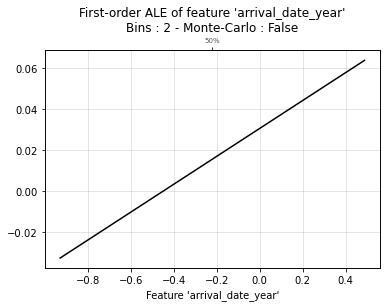

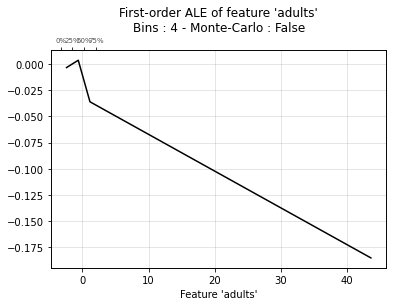

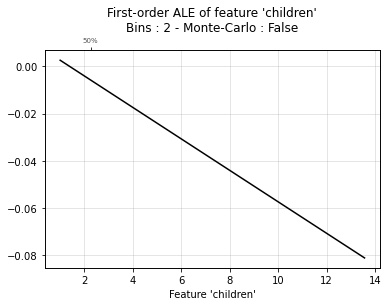

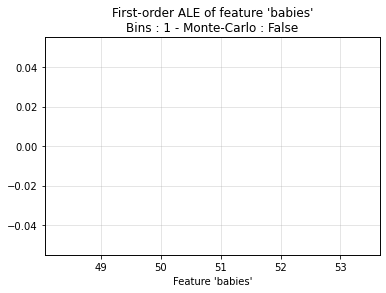

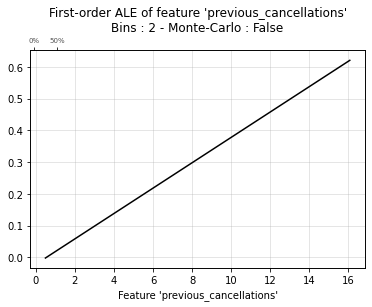

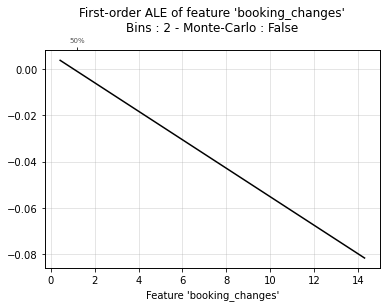

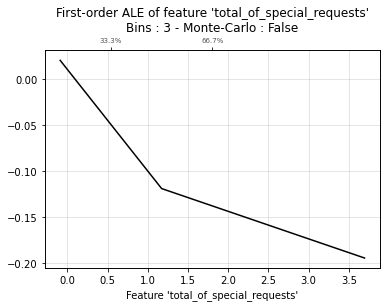

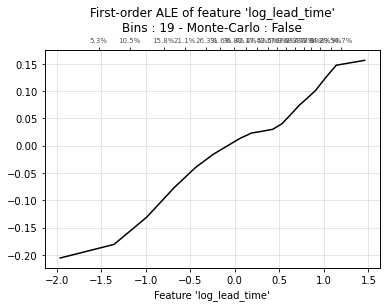

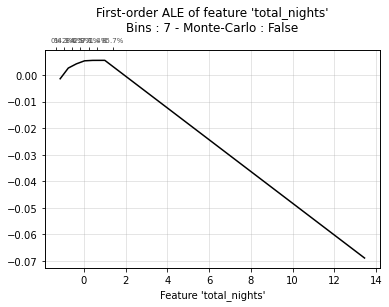

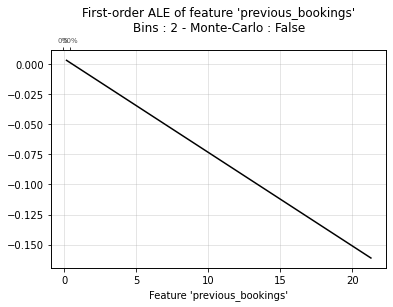

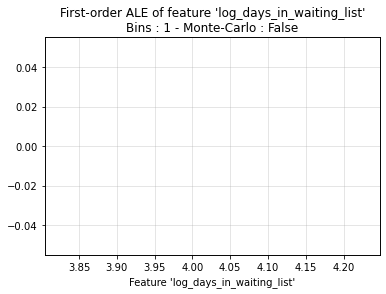

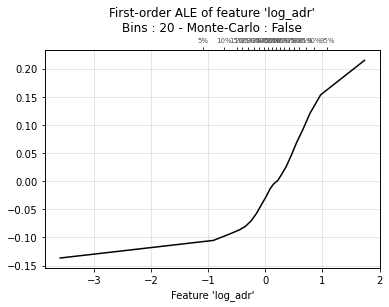

In [26]:
num_features = ["arrival_date_year","adults","children","babies",
           "previous_cancellations","booking_changes","total_of_special_requests",
          "log_lead_time","total_nights","previous_bookings",'log_days_in_waiting_list',
           'log_adr']

for col in num_features:
    ale_plot(clf_mlp_final, X_train, col, bins=20)



Babies and log_days_in_waiting_list do not have a lot of distinct values and is mostly dominated by a single value which is 0. So they do not produce an ALE plot. Children,arrival_date_year,booking_changes and total_nights do not seem to have a significant effect on the final value based on the range on the ALE plot values. 

The top 5 features which influence the values are as follows <br>

1) previous_cancellations <br> 
2) log_lead_time <br> 
3) log_adr <br> 
4) adults <br> 
5) previous_bookings

Considering the top 5 features, previous_cancellations,log_adr and previous_bookings have a linear effect on the outcome. previous_cancellations have an increasing effect on the probability of cancellations while adults and previous_bookings have a decreasing effect on the probability. log_lead_time and log_adr have a non-linear increasing effect on the probability. The effect of log_adr almost seems quadratic.

We can infer that maybe someone who has cancelled a lot previously have a higher probability to cancel again. A booking with a higher lead time could also have a higher probability of cancelling as there is a higher chance of plans to change due to a large window between booking and arrival.


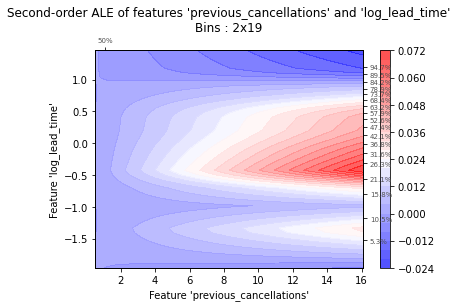

<AxesSubplot:title={'center':"Second-order ALE of features 'previous_cancellations' and 'log_lead_time'\nBins : 2x19"}, xlabel="Feature 'previous_cancellations'", ylabel="Feature 'log_lead_time'">

In [30]:
ale_plot(clf_mlp_final, X_train, ['previous_cancellations','log_lead_time'], bins=20)

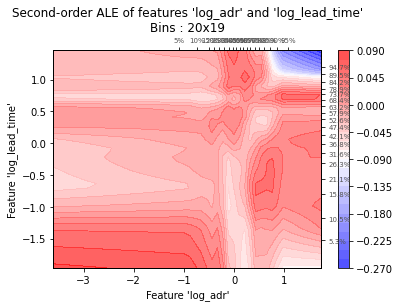

<AxesSubplot:title={'center':"Second-order ALE of features 'log_adr' and 'log_lead_time'\nBins : 20x19"}, xlabel="Feature 'log_adr'", ylabel="Feature 'log_lead_time'">

In [31]:
ale_plot(clf_mlp_final, X_train, ['log_adr','log_lead_time'], bins=20)

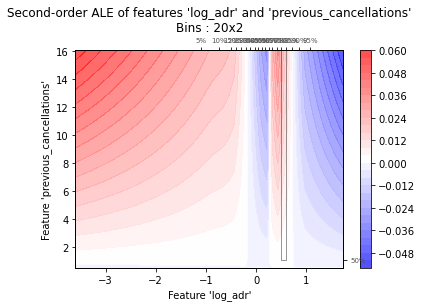

<AxesSubplot:title={'center':"Second-order ALE of features 'log_adr' and 'previous_cancellations'\nBins : 20x2"}, xlabel="Feature 'log_adr'", ylabel="Feature 'previous_cancellations'">

In [32]:
ale_plot(clf_mlp_final, X_train, ['log_adr','previous_cancellations'], bins=20)

Based on the ranges of values in the interaction plots, we can conclude that a significant interaction effect is not present among previous_cancellation and log_lead_time and between previous_cancellations and log_adr. There is a noticeable ineraction effect between log_adr and log_lead_time. For a fixed value of log_adr, the probability of cancelling decreases with increasing value og log_lead_time. This effect is more pronounced at high values of log_adr compared to low values.

In [44]:
y_test.value_counts()

0    15049
1     8828
Name: is_canceled, dtype: int64